## Background
The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.

Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.

Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.

One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.

## Dataset
This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

## AIM
### Studying the variables associated with Covid-19 and use different machine learning algorithms to classify a positive case vs. a negative case.

### Loading required libraries

In [178]:
#pip install graphviz
#pip install pydotplus

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import pydotplus
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  


### Loading the data

In [149]:
df=pd.read_excel('dataset.xlsx')

In [150]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

### Studying the data

In [151]:
print(f"Num rows: {len(df)}")
print(f"Num columns: {len(df.columns)}")

Num rows: 5644
Num columns: 111


In [152]:
df.groupby("SARS-Cov-2 exam result").count()

Patient ID  Patient age quantile  \
SARS-Cov-2 exam result                                     
negative                      5086                  5086   
positive                       558                   558   

                        Patient addmited to regular ward (1=yes, 0=no)  \
SARS-Cov-2 exam result                                                   
negative                                                          5086   
positive                                                           558   

                        Patient addmited to semi-intensive unit (1=yes, 0=no)  \
SARS-Cov-2 exam result                                                          
negative                                                             5086       
positive                                                              558       

                        Patient addmited to intensive care unit (1=yes, 0=no)  \
SARS-Cov-2 exam result                                                          
negative                                                             5086       
positive                                                              558       

                        Hematocrit  Hemoglobin  Platelets  \
SARS-Cov-2 exam result                                      
negative                       520         520        519   
positive                        83          83         83   

                        Mean platelet volume   Red blood Cells  ...  \
SARS-Cov-2 exam result                                          ...   
negative                                  518              519  ...   
positive                                   81               83  ...   

                        Hb saturation (arterial blood gases)  \
SARS-Cov-2 exam result                                         
negative                                                  14   
positive                                                  13   

                        pCO2 (arterial blood gas analysis)  \
SARS-Cov-2 exam result                                       
negative                                                14   
positive                                                13   

                        Base excess (arterial blood gas analysis)  \
SARS-Cov-2 exam result                                              
negative                                                       14   
positive                                                       13   

                        pH (arterial blood gas analysis)  \
SARS-Cov-2 exam result                                     
negative                                              14   
positive                                              13   

                        Total CO2 (arterial blood gas analysis)  \
SARS-Cov-2 exam result                                            
negative                                                     14   
positive                                                     13   

                        HCO3 (arterial blood gas analysis)  \
SARS-Cov-2 exam result                                       
negative                                                14   
positive                                                13   

                        pO2 (arterial blood gas analysis)  Arteiral Fio2  \
SARS-Cov-2 exam result                                                     
negative                                               14             11   
positive                                               13              9   

                        Phosphor  ctO2 (arterial blood gas analysis)  
SARS-Cov-2 exam result                                                
negative                      19                                  14  
positive                       1                                  13  

[2 rows x 110 columns]

In [153]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [154]:
# understand data
df.describe(include="all").T

count unique  \
Patient ID                                          5644   5644   
Patient age quantile                                5644    NaN   
SARS-Cov-2 exam result                              5644      2   
Patient addmited to regular ward (1=yes, 0=no)      5644    NaN   
Patient addmited to semi-intensive unit (1=yes,...  5644    NaN   
Patient addmited to intensive care unit (1=yes,...  5644    NaN   
Hematocrit                                           603    NaN   
Hemoglobin                                           603    NaN   
Platelets                                            602    NaN   
Mean platelet volume                                 599    NaN   
Red blood Cells                                      602    NaN   
Lymphocytes                                          602    NaN   
Mean corpuscular hemoglobin concentration (MCHC)     602    NaN   
Leukocytes                                           602    NaN   
Basophils                                            602    NaN   
Mean corpuscular hemoglobin (MCH)                    602    NaN   
Eosinophils                                          602    NaN   
Mean corpuscular volume (MCV)                        602    NaN   
Monocytes                                            601    NaN   
Red blood cell distribution width (RDW)              602    NaN   
Serum Glucose                                        208    NaN   
Respiratory Syncytial Virus                         1354      2   
Influenza A                                         1354      2   
Influenza B                                         1354      2   
Parainfluenza 1                                     1352      2   
CoronavirusNL63                                     1352      2   
Rhinovirus/Enterovirus                              1352      2   
Mycoplasma pneumoniae                                  0    NaN   
Coronavirus HKU1                                    1352      2   
Parainfluenza 3                                     1352      2   
...                                                  ...    ...   
Urine - Sugar                                          0    NaN   
Urine - Leukocytes                                    70     31   
Urine - Crystals                                      70      5   
Urine - Red blood cells                               70    NaN   
Urine - Hyaline cylinders                             67      1   
Urine - Granular cylinders                            69      1   
Urine - Yeasts                                        70      1   
Urine - Color                                         70      4   
Partial thromboplastin time (PTT)                      0    NaN   
Relationship (Patient/Normal)                         91    NaN   
International normalized ratio (INR)                 133    NaN   
Lactic Dehydrogenase                                 101    NaN   
Prothrombin time (PT), Activity                        0    NaN   
Vitamin B12                                            3    NaN   
Creatine phosphokinase (CPK)                         104    NaN   
Ferritin                                              23    NaN   
Arterial Lactic Acid                                  27    NaN   
Lipase dosage                                          8    NaN   
D-Dimer                                                0    NaN   
Albumin                                               13    NaN   
Hb saturation (arterial blood gases)                  27    NaN   
pCO2 (arterial blood gas analysis)                    27    NaN   
Base excess (arterial blood gas analysis)             27    NaN   
pH (arterial blood gas analysis)                      27    NaN   
Total CO2 (arterial blood gas analysis)               27    NaN   
HCO3 (arterial blood gas analysis)                    27    NaN   
pO2 (arterial blood gas analysis)                     27    NaN   
Arteiral Fio2                                         20    NaN   
Phosphor                       

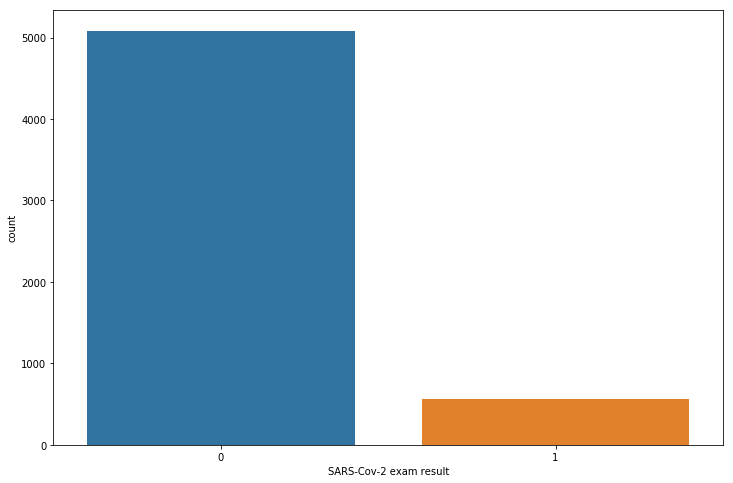

In [155]:
plt.figure(figsize=(12,8))
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].replace(['negative','positive'], [0,1])
sns.countplot(df['SARS-Cov-2 exam result'])

In [156]:
print(f"Num positive cases: {len(df[df['SARS-Cov-2 exam result'] == 1])}")
print(f"Num negative cases: {len(df[df['SARS-Cov-2 exam result'] == 0])}")

Num positive cases: 558
Num negative cases: 5086


In [157]:
print("There are {}% target values with 1".format(100 * df['SARS-Cov-2 exam result'].value_counts()[1]/df.shape[0]))





There are 9.886605244507441% target values with 1


### The data is unbalanced (approximatly 90%-10% negative-positive), which will bias any statistical model.

### Let's look at the number and percentage of missing values in each column

In [158]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [159]:
missing_data(df)

Patient ID Patient age quantile SARS-Cov-2 exam result  \
Total            0                    0                      0   
Percent          0                    0                      0   
Types       object                int64                  int64   

        Patient addmited to regular ward (1=yes, 0=no)  \
Total                                                0   
Percent                                              0   
Types                                            int64   

        Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Total                                                    0      
Percent                                                  0      
Types                                                int64      

        Patient addmited to intensive care unit (1=yes, 0=no) Hematocrit  \
Total                                                    0          5041   
Percent                                                  0       89.3161   
Types                                                int64       float64   

        Hemoglobin Platelets Mean platelet volume   ...  \
Total         5041      5042                  5045  ...   
Percent    89.3161   89.3338                89.387  ...   
Types      float64   float64               float64  ...   

        Hb saturation (arterial blood gases)  \
Total                                   5617   
Percent                              99.5216   
Types                                float64   

        pCO2 (arterial blood gas analysis)  \
Total                                 5617   
Percent                            99.5216   
Types                              float64   

        Base excess (arterial blood gas analysis)  \
Total                                        5617   
Percent                                   99.5216   
Types                                     float64   

        pH (arterial blood gas analysis)  \
Total                               5617   
Percent                          99.5216   
Types                            float64   

        Total CO2 (arterial blood gas analysis)  \
Total                                      5617   
Percent                                 99.5216   
Types                                   float64   

        HCO3 (arterial blood gas analysis) pO2 (arterial blood gas analysis)  \
Total                                 5617                              5617   
Percent                            99.5216                           99.5216   
Types                              float64                           float64   

        Arteiral Fio2 Phosphor ctO2 (arterial blood gas analysis)  
Total            5624     5624                               5617  
Percent       99.6456  99.6456                            99.5216  
Types         float64  float64                            float64  

[3 rows x 111 columns]

### Plotting the percentage of missing data variable wise

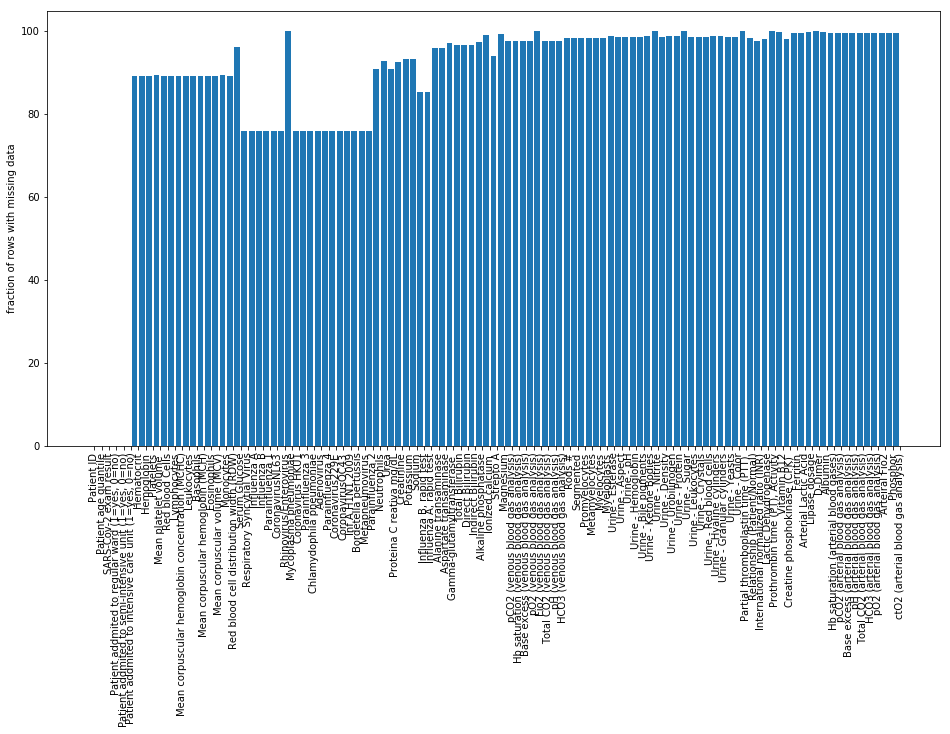

In [160]:
null_perc = df.isnull().sum()*100/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_perc))+0.5,null_perc.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_perc)),null_perc)
plt.show()

### Based on this plot, It's clear that this dataset has a lot of missing values. Only 6 columns have no null values. There are features with 100% NULL. 

In [118]:
df1=df.copy()
df1['count'] = 1

In [122]:
df1.groupby("Patient addmited to intensive care unit (1=yes, 0=no)").agg({'count': 'sum'})

count
Patient addmited to intensive care unit (1=yes,...       
0                                                    5603
1                                                      41

#### The number of possible positive tested patients is equally distributed across age quantiles, except for the first two quantiles.

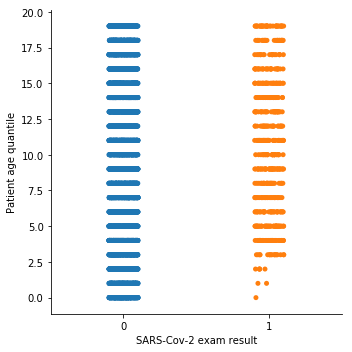

In [123]:
sns.catplot(x='SARS-Cov-2 exam result', y="Patient age quantile", data=df1);

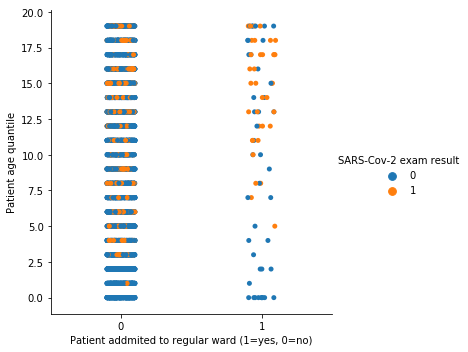

In [124]:
sns.catplot(x='Patient addmited to regular ward (1=yes, 0=no)', y="Patient age quantile", hue="SARS-Cov-2 exam result", data=df1);

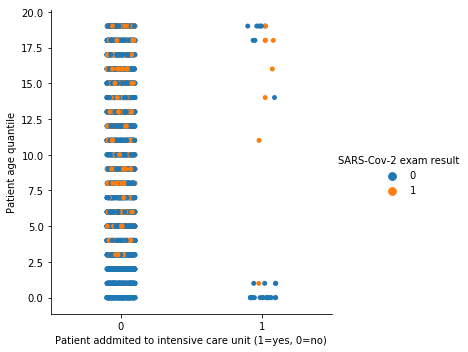

In [125]:
sns.catplot(x='Patient addmited to intensive care unit (1=yes, 0=no)', y="Patient age quantile", hue="SARS-Cov-2 exam result", data=df1);

#### Most of the patients were not admitted to the regular ward, which is expected. On the other hand, most of the patients that were admitted to the regular ward are older and most them tested positive.

### Checking Correlation between variables

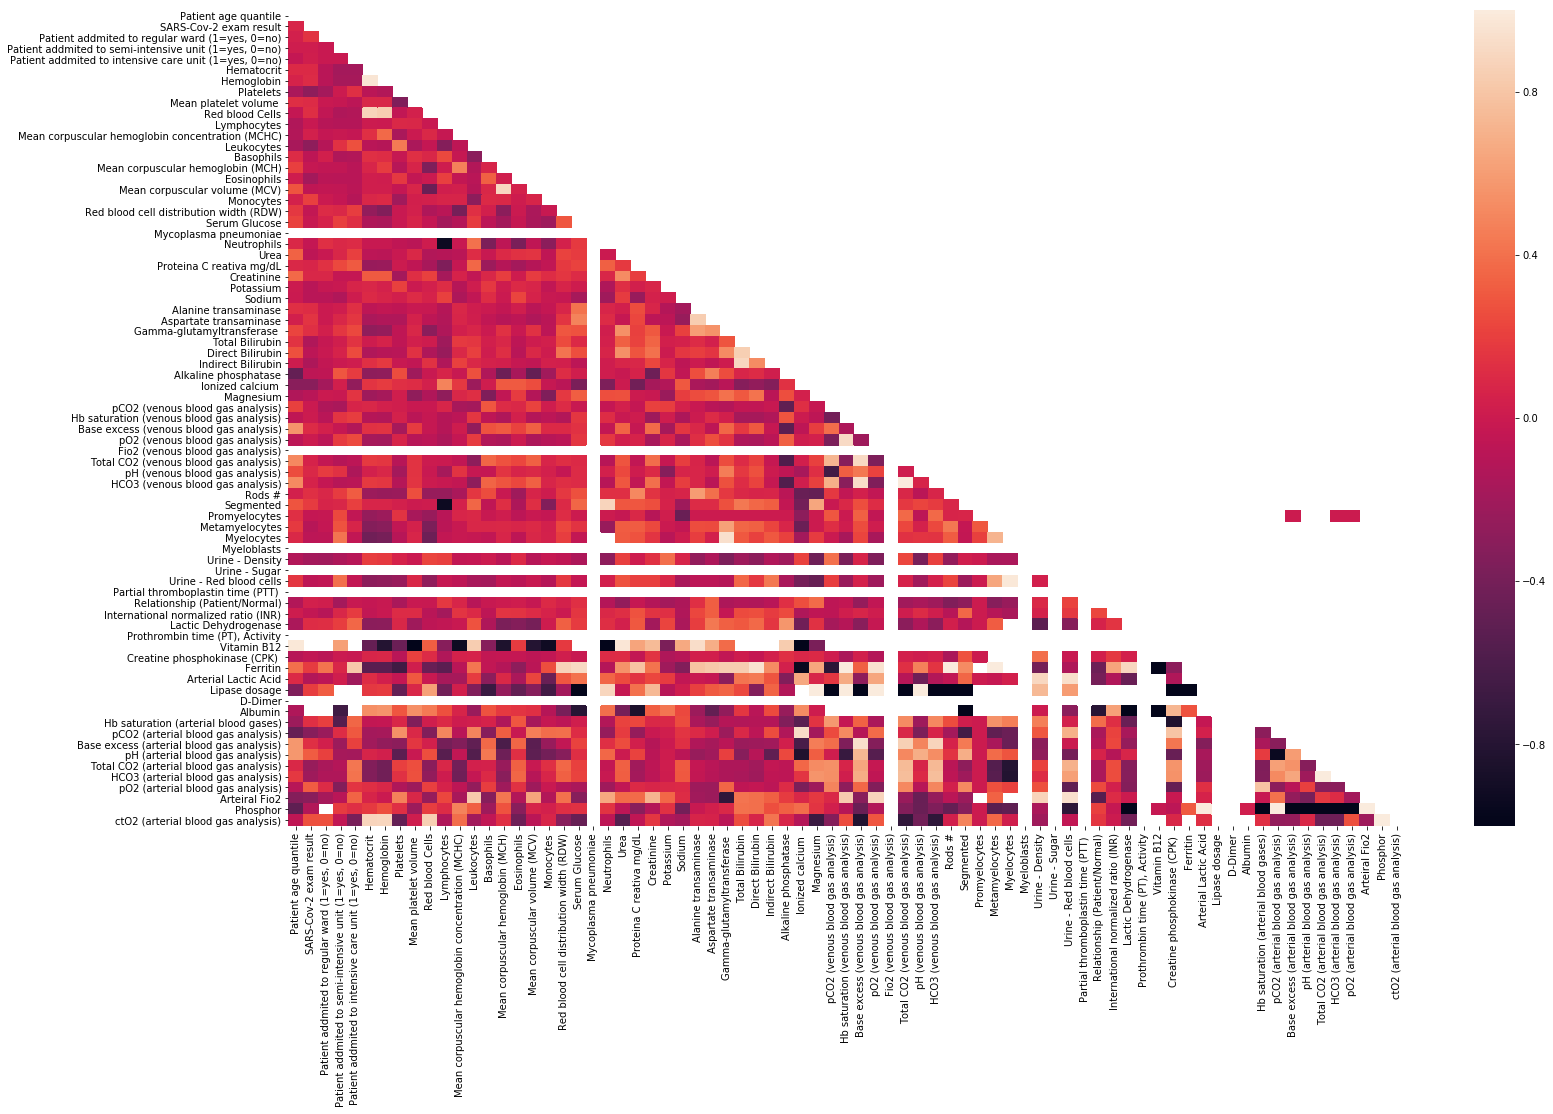

In [161]:
plt.figure(figsize=(25, 15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), mask=matrix)

### We see that although there are many variables, most of them are not very highly correlated while few of them don't have any correlation.

## First try...
### We will check the columns that have full datas and are not null to build a model.

In [162]:
data_null=df.isna().sum()
(data_null/df.shape[0]*100).round(2)
#collect columns with good data
good_columns = data_null[data_null==0].reset_index()
good_columns

index  0
0                                         Patient ID  0
1                               Patient age quantile  0
2                             SARS-Cov-2 exam result  0
3     Patient addmited to regular ward (1=yes, 0=no)  0
4  Patient addmited to semi-intensive unit (1=yes...  0
5  Patient addmited to intensive care unit (1=yes...  0

In [163]:
#create a new dataframe with good columns
data1=df[good_columns['index']]
data1.head()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13                       0   
1  126e9dd13932f68                    17                       0   
2  a46b4402a0e5696                     8                       0   
3  f7d619a94f97c45                     5                       0   
4  d9e41465789c2b5                    15                       0   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0

#### Checing correlation amoong these variables

In [164]:
#check correlation
data1.corr()

Patient age quantile  \
Patient age quantile                                            1.000000   
SARS-Cov-2 exam result                                          0.075244   
Patient addmited to regular ward (1=yes, 0=no)                  0.046166   
Patient addmited to semi-intensive unit (1=yes,...              0.015736   
Patient addmited to intensive care unit (1=yes,...             -0.035772   

                                                    SARS-Cov-2 exam result  \
Patient age quantile                                              0.075244   
SARS-Cov-2 exam result                                            1.000000   
Patient addmited to regular ward (1=yes, 0=no)                    0.142437   
Patient addmited to semi-intensive unit (1=yes,...                0.019364   
Patient addmited to intensive care unit (1=yes,...                0.027586   

                                                    Patient addmited to regular ward (1=yes, 0=no)  \
Patient age quantile                                                                      0.046166   
SARS-Cov-2 exam result                                                                    0.142437   
Patient addmited to regular ward (1=yes, 0=no)                                            1.000000   
Patient addmited to semi-intensive unit (1=yes,...                                       -0.011264   
Patient addmited to intensive care unit (1=yes,...                                       -0.010192   

                                                    Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.015736       
SARS-Cov-2 exam result                                                                       0.019364       
Patient addmited to regular ward (1=yes, 0=no)                                              -0.011264       
Patient addmited to semi-intensive unit (1=yes,...                                           1.000000       
Patient addmited to intensive care unit (1=yes,...                                          -0.008087       

                                                    Patient addmited to intensive care unit (1=yes, 0=no)  
Patient age quantile                                                                        -0.035772      
SARS-Cov-2 exam result                                                                       0.027586      
Patient addmited to regular ward (1=yes, 0=no)                                              -0.010192      
Patient addmited to semi-intensive unit (1=yes,...                                          -0.008087      
Patient addmited to intensive care unit (1=yes,...                                           1.000000

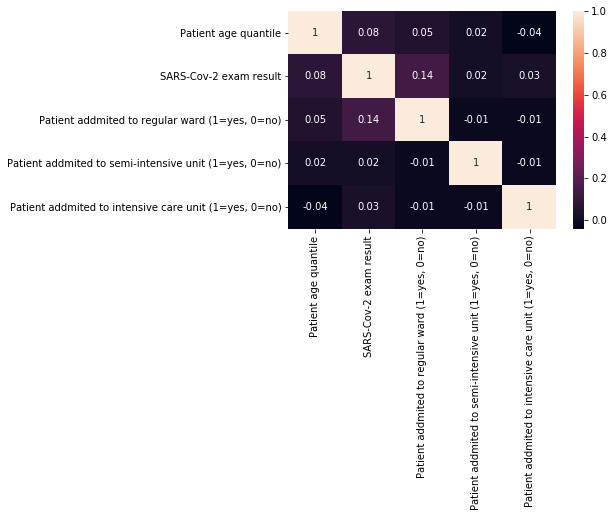

In [165]:
# check correlation with graphics...
ax = sns.heatmap(data1.corr().round(2), annot=True)
plt.show()

#### It is evident that these variables don't have any positive or negative correlation among themselves. Let's try to build our model using only these features.

## Logistic Regression

In [166]:
# dropping the non numeical column as it will not be used in the modelling process.
data1 = data1.drop([
    "Patient ID",], axis=1)

In [167]:
# get the target variable
target = data1['SARS-Cov-2 exam result']


In [168]:
# all the other columns for training the model
expl = data1.drop(columns='SARS-Cov-2 exam result')

In [40]:
feature_cols = ['Patient age quantile','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)']


In [50]:
#split into training and testing
X_treino, X_teste, Y_treino, Y_teste = train_test_split(expl, target, test_size=0.3, random_state=30)

In [51]:
#fit model
model_lr = LogisticRegression()
model_lr.fit(X_treino, Y_treino)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Validating the model

In [52]:
#check score training data
print(round(model_lr.score(X_treino, Y_treino)*100,2), '%')


90.25 %


In [53]:
#check score test data
print(round(model_lr.score(X_teste, Y_teste)*100,2),'%')

89.79 %


In [54]:
#check confusion matrix

confusion_matrix(Y_teste, model_lr.predict(X_teste))

array([[1521,    0],
       [ 173,    0]])

In [170]:
Y_pred_lr=model_lr.predict(X_teste)
print("Classification Report")
print(metrics.classification_report(Y_test, Y_pred_lr,digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.8979    1.0000    0.9462      1521
           1     0.0000    0.0000    0.0000       173

    accuracy                         0.8979      1694
   macro avg     0.4489    0.5000    0.4731      1694
weighted avg     0.8062    0.8979    0.8496      1694



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Trees

In [56]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_treino, Y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Model validation

In [174]:
#check score training data
print(round(model_tree.score(X_treino, Y_treino)*100,2), '%')

90.63 %


In [175]:
#check score test data
print(round(model_tree.score(X_teste, Y_teste)*100,2),'%')

89.79 %


In [176]:
#check confusion matrix

confusion_matrix(Y_teste, model_tree.predict(X_teste))

array([[1515,    6],
       [ 167,    6]])

In [177]:
Y_pred_tree=model_tree.predict(X_teste)
print("Classification Report")
print(metrics.classification_report(Y_test, Y_pred_tree,digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9007    0.9961    0.9460      1521
           1     0.5000    0.0347    0.0649       173

    accuracy                         0.8979      1694
   macro avg     0.7004    0.5154    0.5054      1694
weighted avg     0.8598    0.8979    0.8560      1694



### Plotting the decision tree

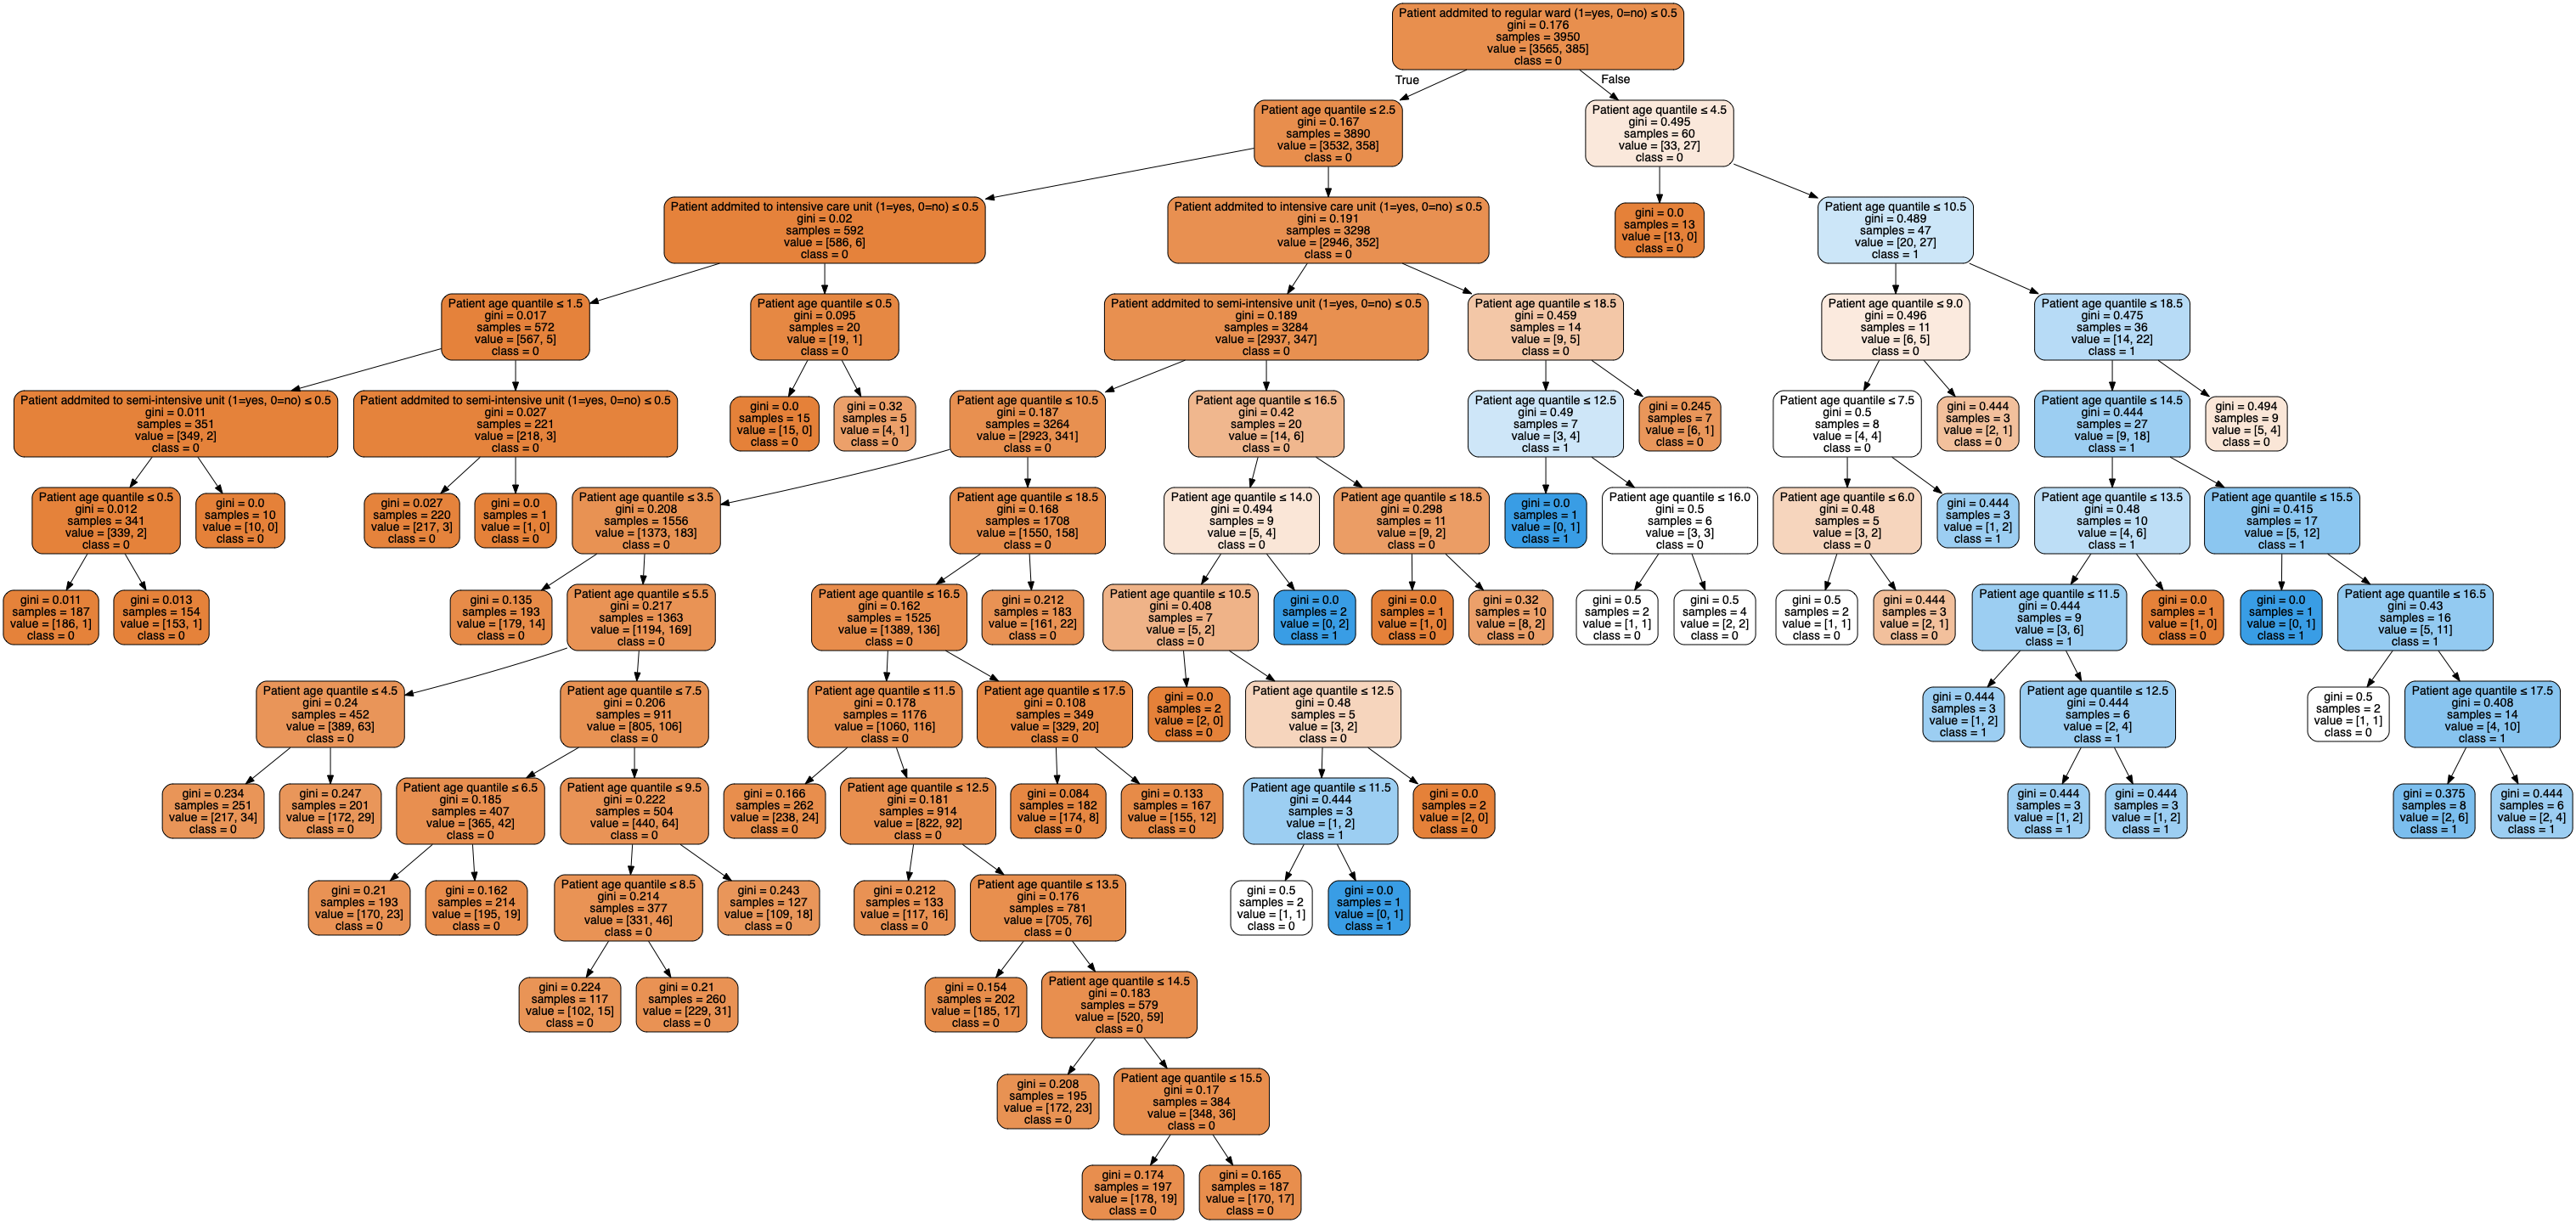

In [61]:
dot_data = StringIO()
export_graphviz(model_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Random Forest

In [179]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_treino, Y_treino);

In [180]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_teste)
# Calculate the absolute errors
errors = abs(predictions - Y_teste)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.17 degrees.


### Validating the model

In [182]:
y_pred = rf.predict(X_teste)

In [183]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_teste, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_teste, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_teste, y_pred)))

Mean Absolute Error: 0.16876975928622384
Mean Squared Error: 0.0879112903475432
Root Mean Squared Error: 0.29649838169464465


In [240]:
print("Accuracy:",metrics.accuracy_score(Y_teste, y_pred.round()))

Accuracy: 0.898465171192444


In [248]:
#check confusion matrix

confusion_matrix(Y_teste, y_pred.round())

array([[1515,    6],
       [ 166,    7]])

In [249]:
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred.round(),digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9012    0.9961    0.9463      1521
           1     0.5385    0.0405    0.0753       173

    accuracy                         0.8985      1694
   macro avg     0.7199    0.5183    0.5108      1694
weighted avg     0.8642    0.8985    0.8573      1694



### Random Forest performs the best in the first scenario, by a small margin. Whereas Logistic regression and Decision trees have the same performance accuracy.

### Plotting the ROC curve and checking AUC

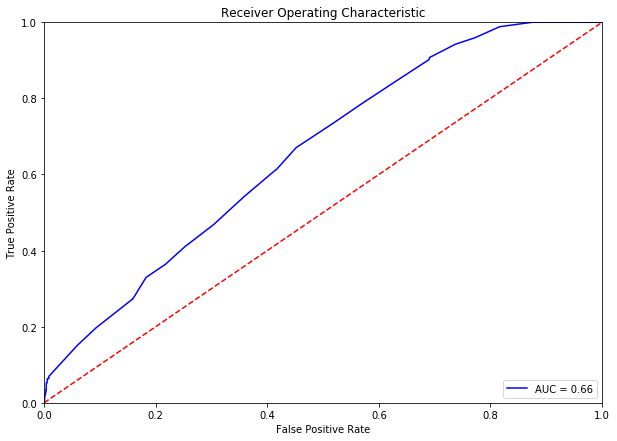

In [184]:
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    fig, ax = plt.subplots(figsize=(10,7))
    ax.set_title('Receiver Operating Characteristic')
    ax.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    ax.legend(loc = 'lower right')
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    return ax


plot_roc_curve(Y_teste, y_pred)

In [185]:
roc_auc_score(Y_teste, y_pred)

0.6570308551188943

## Second try...
### We will check the data of all columns and do some steps:

### 1) fix it if necessary.
### 2) remove some columns with there are not relevance.
### 3) create dummy variable

In [186]:
#create a list of columns with datatype == 'object'
x1=[]
for c in df.columns:
    x=df[c].dtype
    if x == 'object' and c != 'Patient ID':
        x1.append(c)
print(x1)

['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A', 'Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']


In [187]:
#check unique values on list
for a in x1:
    print('analyzing column: ', a)
    print(df[a].unique())
    print()

analyzing column:  Respiratory Syncytial Virus
[nan 'not_detected' 'detected']

analyzing column:  Influenza A
[nan 'not_detected' 'detected']

analyzing column:  Influenza B
[nan 'not_detected' 'detected']

analyzing column:  Parainfluenza 1
[nan 'not_detected' 'detected']

analyzing column:  CoronavirusNL63
[nan 'not_detected' 'detected']

analyzing column:  Rhinovirus/Enterovirus
[nan 'detected' 'not_detected']

analyzing column:  Coronavirus HKU1
[nan 'not_detected' 'detected']

analyzing column:  Parainfluenza 3
[nan 'not_detected' 'detected']

analyzing column:  Chlamydophila pneumoniae
[nan 'not_detected' 'detected']

analyzing column:  Adenovirus
[nan 'not_detected' 'detected']

analyzing column:  Parainfluenza 4
[nan 'not_detected' 'detected']

analyzing column:  Coronavirus229E
[nan 'not_detected' 'detected']

analyzing column:  CoronavirusOC43
[nan 'not_detected' 'detected']

analyzing column:  Inf A H1N1 2009
[nan 'not_detected' 'detected']

analyzing column:  Bordetella pe

In [188]:
#replace some datas
df=df.replace(['positive','negative','not_detected','detected','not_done','absent','Não Realizado','present','normal'],
                  [1,0,0,1,np.nan,0,np.nan,1,0])
df['Urine - Leukocytes'].replace('<1000', '999', inplace=True)
df['Urine - pH'] = df['Urine - pH'].astype("float64")
df['Urine - Leukocytes'] = df['Urine - Leukocytes'].astype("float64")
df['Urine - Urobilinogen'] = df['Urine - Urobilinogen'].astype("float64")

In [189]:
#replace nan by 0
df = df.fillna(0)

In [190]:
# Making dummies variable from categorical

#create dataframe with dummies
data_dummies=pd.get_dummies(df[df.dtypes[(df.dtypes == "object")].drop("Patient ID").index])
data_dummies.head()

Urine - Aspect_0  Urine - Aspect_altered_coloring  Urine - Aspect_clear  \
0                 1                                0                     0   
1                 1                                0                     0   
2                 1                                0                     0   
3                 1                                0                     0   
4                 1                                0                     0   

   Urine - Aspect_cloudy  Urine - Aspect_lightly_cloudy  Urine - Crystals_0  \
0                      0                              0                   1   
1                      0                              0                   1   
2                      0                              0                   1   
3                      0                              0                   1   
4                      0                              0                   1   

   Urine - Crystals_Ausentes  Urine - Crystals_Oxalato de Cálcio +++  \
0                          0                                       0   
1                          0                                       0   
2                          0                                       0   
3                          0                                       0   
4                          0                                       0   

   Urine - Crystals_Oxalato de Cálcio -++  Urine - Crystals_Urato Amorfo +++  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Urine - Crystals_Urato Amorfo --+  Urine - Color_0  \
0                                  0                1   
1                                  0                1   
2                                  0                1   
3                                  0                1   
4                                  0                1   

   Urine - Color_citrus_yellow  Urine - Color_light_yellow  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   Urine - Color_orange  Urine - Color_yellow  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0

In [191]:
#create dataframe without dtypes object
data2=pd.concat([df["Patient ID"], df[df.dtypes[(df.dtypes != "object")].index]], axis=1)

In [192]:
#concate dummies with not-dummies and target
df=pd.concat([data_dummies,data2], axis=1)

In [193]:
#check if have columns empty
df.describe(include="all").T.round().sort_values('max', ascending=True)

count unique              top freq  \
Urine - Ketone Bodies                    5644    NaN              NaN  NaN   
Fio2 (venous blood gas analysis)         5644    NaN              NaN  NaN   
Myeloblasts                              5644    NaN              NaN  NaN   
Urine - Esterase                         5644    NaN              NaN  NaN   
Urine - Bile pigments                    5644    NaN              NaN  NaN   
Urine - Nitrite                          5644    NaN              NaN  NaN   
Urine - Urobilinogen                     5644    NaN              NaN  NaN   
Mycoplasma pneumoniae                    5644    NaN              NaN  NaN   
Urine - Protein                          5644    NaN              NaN  NaN   
Urine - Hyaline cylinders                5644    NaN              NaN  NaN   
Urine - Granular cylinders               5644    NaN              NaN  NaN   
Urine - Yeasts                           5644    NaN              NaN  NaN   
Partial thromboplastin time (PTT)        5644    NaN              NaN  NaN   
Prothrombin time (PT), Activity          5644    NaN              NaN  NaN   
D-Dimer                                  5644    NaN              NaN  NaN   
Urine - Sugar                            5644    NaN              NaN  NaN   
Parainfluenza 2                          5644    NaN              NaN  NaN   
Vitamin B12                              5644    NaN              NaN  NaN   
Parainfluenza 3                          5644    NaN              NaN  NaN   
Coronavirus HKU1                         5644    NaN              NaN  NaN   
Urine - Aspect_0                         5644    NaN              NaN  NaN   
CoronavirusNL63                          5644    NaN              NaN  NaN   
Parainfluenza 1                          5644    NaN              NaN  NaN   
Chlamydophila pneumoniae                 5644    NaN              NaN  NaN   
Rhinovirus/Enterovirus                   5644    NaN              NaN  NaN   
Adenovirus                               5644    NaN              NaN  NaN   
Strepto A                                5644    NaN              NaN  NaN   
Coronavirus229E                          5644    NaN              NaN  NaN   
CoronavirusOC43                          5644    NaN              NaN  NaN   
Inf A H1N1 2009                          5644    NaN              NaN  NaN   
...                                       ...    ...              ...  ...   
Sodium                                   5644    NaN              NaN  NaN   
Mean corpuscular hemoglobin (MCH)        5644    NaN              NaN  NaN   
Leukocytes                               5644    NaN              NaN  NaN   
Monocytes                                5644    NaN              NaN  NaN   
Relationship (Patient/Normal)            5644    NaN              NaN  NaN   
Total Bilirubin                          5644    NaN              NaN  NaN   
Creatinine                               5644    NaN              NaN  NaN   
pCO2 (venous blood gas analysis)         5644    NaN              NaN  NaN   
Metamyelocytes                           5644    NaN              NaN  NaN   
Myelocytes                               5644    NaN              NaN  NaN   
Indirect Bilirubin                       5644    NaN              NaN  NaN   
Red blood cell distribution width (RDW)  5644    NaN              NaN  NaN   
Direct Bilirubin                         5644    NaN              NaN  NaN   
Serum Glucose                            5644    NaN              NaN  NaN   
Creatine phosphokinase (CPK)             5644    NaN              NaN  NaN   
Aspartate transaminase                   5644    NaN              NaN  NaN   
International normalized ratio (INR)     5644    NaN              NaN  NaN   
Urine - Red blood cells                  5644    NaN              NaN  NaN   
Alanine transaminase                     5644    NaN              NaN  NaN   
Urine - pH                               5644    NaN          

In [194]:
#remove columns without data

#create a list of columns
list_empty=df[df.sum()[(df.sum() == 0)].index].columns
print(list_empty)

Index(['Mycoplasma pneumoniae', 'Parainfluenza 2',
       'Fio2 (venous blood gas analysis)', 'Myeloblasts', 'Urine - Esterase',
       'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite',
       'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Sugar',
       'Urine - Hyaline cylinders', 'Urine - Granular cylinders',
       'Urine - Yeasts', 'Partial thromboplastin time (PTT) ',
       'Prothrombin time (PT), Activity', 'D-Dimer'],
      dtype='object')


In [195]:
#create a dataframe without empty data
df=df.drop(list_empty,axis=1)
df.shape

(5644, 107)

In [196]:
df.head()

Urine - Aspect_0  Urine - Aspect_altered_coloring  Urine - Aspect_clear  \
0                 1                                0                     0   
1                 1                                0                     0   
2                 1                                0                     0   
3                 1                                0                     0   
4                 1                                0                     0   

   Urine - Aspect_cloudy  Urine - Aspect_lightly_cloudy  Urine - Crystals_0  \
0                      0                              0                   1   
1                      0                              0                   1   
2                      0                              0                   1   
3                      0                              0                   1   
4                      0                              0                   1   

   Urine - Crystals_Ausentes  Urine - Crystals_Oxalato de Cálcio +++  \
0                          0                                       0   
1                          0                                       0   
2                          0                                       0   
3                          0                                       0   
4                          0                                       0   

   Urine - Crystals_Oxalato de Cálcio -++  Urine - Crystals_Urato Amorfo +++  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   ...  Hb saturation (arterial blood gases)  \
0  ...                                   0.0   
1  ...                                   0.0   
2  ...                                   0.0   
3  ...                                   0.0   
4  ...                                   0.0   

   pCO2 (arterial blood gas analysis)  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   Base excess (arterial blood gas analysis)  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               0.0                                      0.0   
1                               0.0                                      0.0   
2                               0.0                                      0.0   
3                               0.0                                      0.0   
4                               0.0                                      0.0   

   HCO3 (arterial blood gas analysis) pO2 (arterial blood gas analysis)  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 0.0                               0.0   
4                                 0.0                               0.0   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            0.0       0.0                                 0.0  
1            0.0       0.0                                 0.0  
2            0.0       0.0                                 0.0  
3            0.0       0.0                                 0.0  
4            0.0       0.0                                 0.0 

## Logistic Regression

In [197]:
# remove some columns
data3 = df.drop([
    "Patient ID",
    'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)'
], axis=1)

In [198]:
data3.head()

Urine - Aspect_0  Urine - Aspect_altered_coloring  Urine - Aspect_clear  \
0                 1                                0                     0   
1                 1                                0                     0   
2                 1                                0                     0   
3                 1                                0                     0   
4                 1                                0                     0   

   Urine - Aspect_cloudy  Urine - Aspect_lightly_cloudy  Urine - Crystals_0  \
0                      0                              0                   1   
1                      0                              0                   1   
2                      0                              0                   1   
3                      0                              0                   1   
4                      0                              0                   1   

   Urine - Crystals_Ausentes  Urine - Crystals_Oxalato de Cálcio +++  \
0                          0                                       0   
1                          0                                       0   
2                          0                                       0   
3                          0                                       0   
4                          0                                       0   

   Urine - Crystals_Oxalato de Cálcio -++  Urine - Crystals_Urato Amorfo +++  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   ...  Hb saturation (arterial blood gases)  \
0  ...                                   0.0   
1  ...                                   0.0   
2  ...                                   0.0   
3  ...                                   0.0   
4  ...                                   0.0   

   pCO2 (arterial blood gas analysis)  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   Base excess (arterial blood gas analysis)  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               0.0                                      0.0   
1                               0.0                                      0.0   
2                               0.0                                      0.0   
3                               0.0                                      0.0   
4                               0.0                                      0.0   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 0.0                                0.0   
1                                 0.0                                0.0   
2                                 0.0                                0.0   
3                                 0.0                                0.0   
4                                 0.0                                0.0   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            0.0       0.0                                 0.0  
1            0.0       0.0                                 0.0  
2            0.0       0.0                                 0.0  
3            0.0       0.0                                 0.0  
4            0.0       0.0                               

In [199]:
# get target
target = df['SARS-Cov-2 exam result']


In [200]:
expl2 = data3.drop(columns='SARS-Cov-2 exam result')

In [201]:
#split into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(expl2, target, test_size=0.3, random_state=30)

In [202]:
#fit model
model_lr2 = LogisticRegression()
model_lr2.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
#check score training data
print(round(model_lr2.score(X_train, Y_train)*100,2), '%')

90.71 %


In [244]:
#check score test data
print(round(model_lr2.score(X_test, Y_test)*100,2),'%')

90.5 %


In [245]:
#check confusion matrix

confusion_matrix(Y_test, model_lr2.predict(X_test))

array([[1521,    0],
       [ 161,   12]])

In [206]:
Y_pred_logistic = model_lr2.predict(X_test)

In [207]:
print("Classification Report")
print(metrics.classification_report(Y_test, Y_pred_logistic,digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9043    1.0000    0.9497      1521
           1     1.0000    0.0694    0.1297       173

    accuracy                         0.9050      1694
   macro avg     0.9521    0.5347    0.5397      1694
weighted avg     0.9141    0.9050    0.8660      1694



### The performance has increased by approximately 2% compared to the previous logistic model.

## Decision Trees

In [209]:
model_tree2 = tree.DecisionTreeClassifier()
model_tree2.fit(X_train, Y_train)
Y_pred_tree = model_tree2.predict(X_test)


In [210]:
#check score training data
print(round(model_tree2.score(X_train, Y_train)*100,2), '%')

91.9 %


In [211]:
#check score test data
print(round(model_tree2.score(X_test, Y_test)*100,2),'%')

89.49 %


In [212]:
#check confusion matrix

confusion_matrix(Y_test, model_tree2.predict(X_test))

array([[1505,   16],
       [ 162,   11]])

In [213]:
print("Classification Report")
print(metrics.classification_report(Y_test, Y_pred_tree,digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9028    0.9895    0.9442      1521
           1     0.4074    0.0636    0.1100       173

    accuracy                         0.8949      1694
   macro avg     0.6551    0.5265    0.5271      1694
weighted avg     0.8522    0.8949    0.8590      1694



### Decison trees performance has gone a little down and was not expected. Let's plot our tree and check.

In [214]:
feature_cols2 = list(expl2.columns.values)

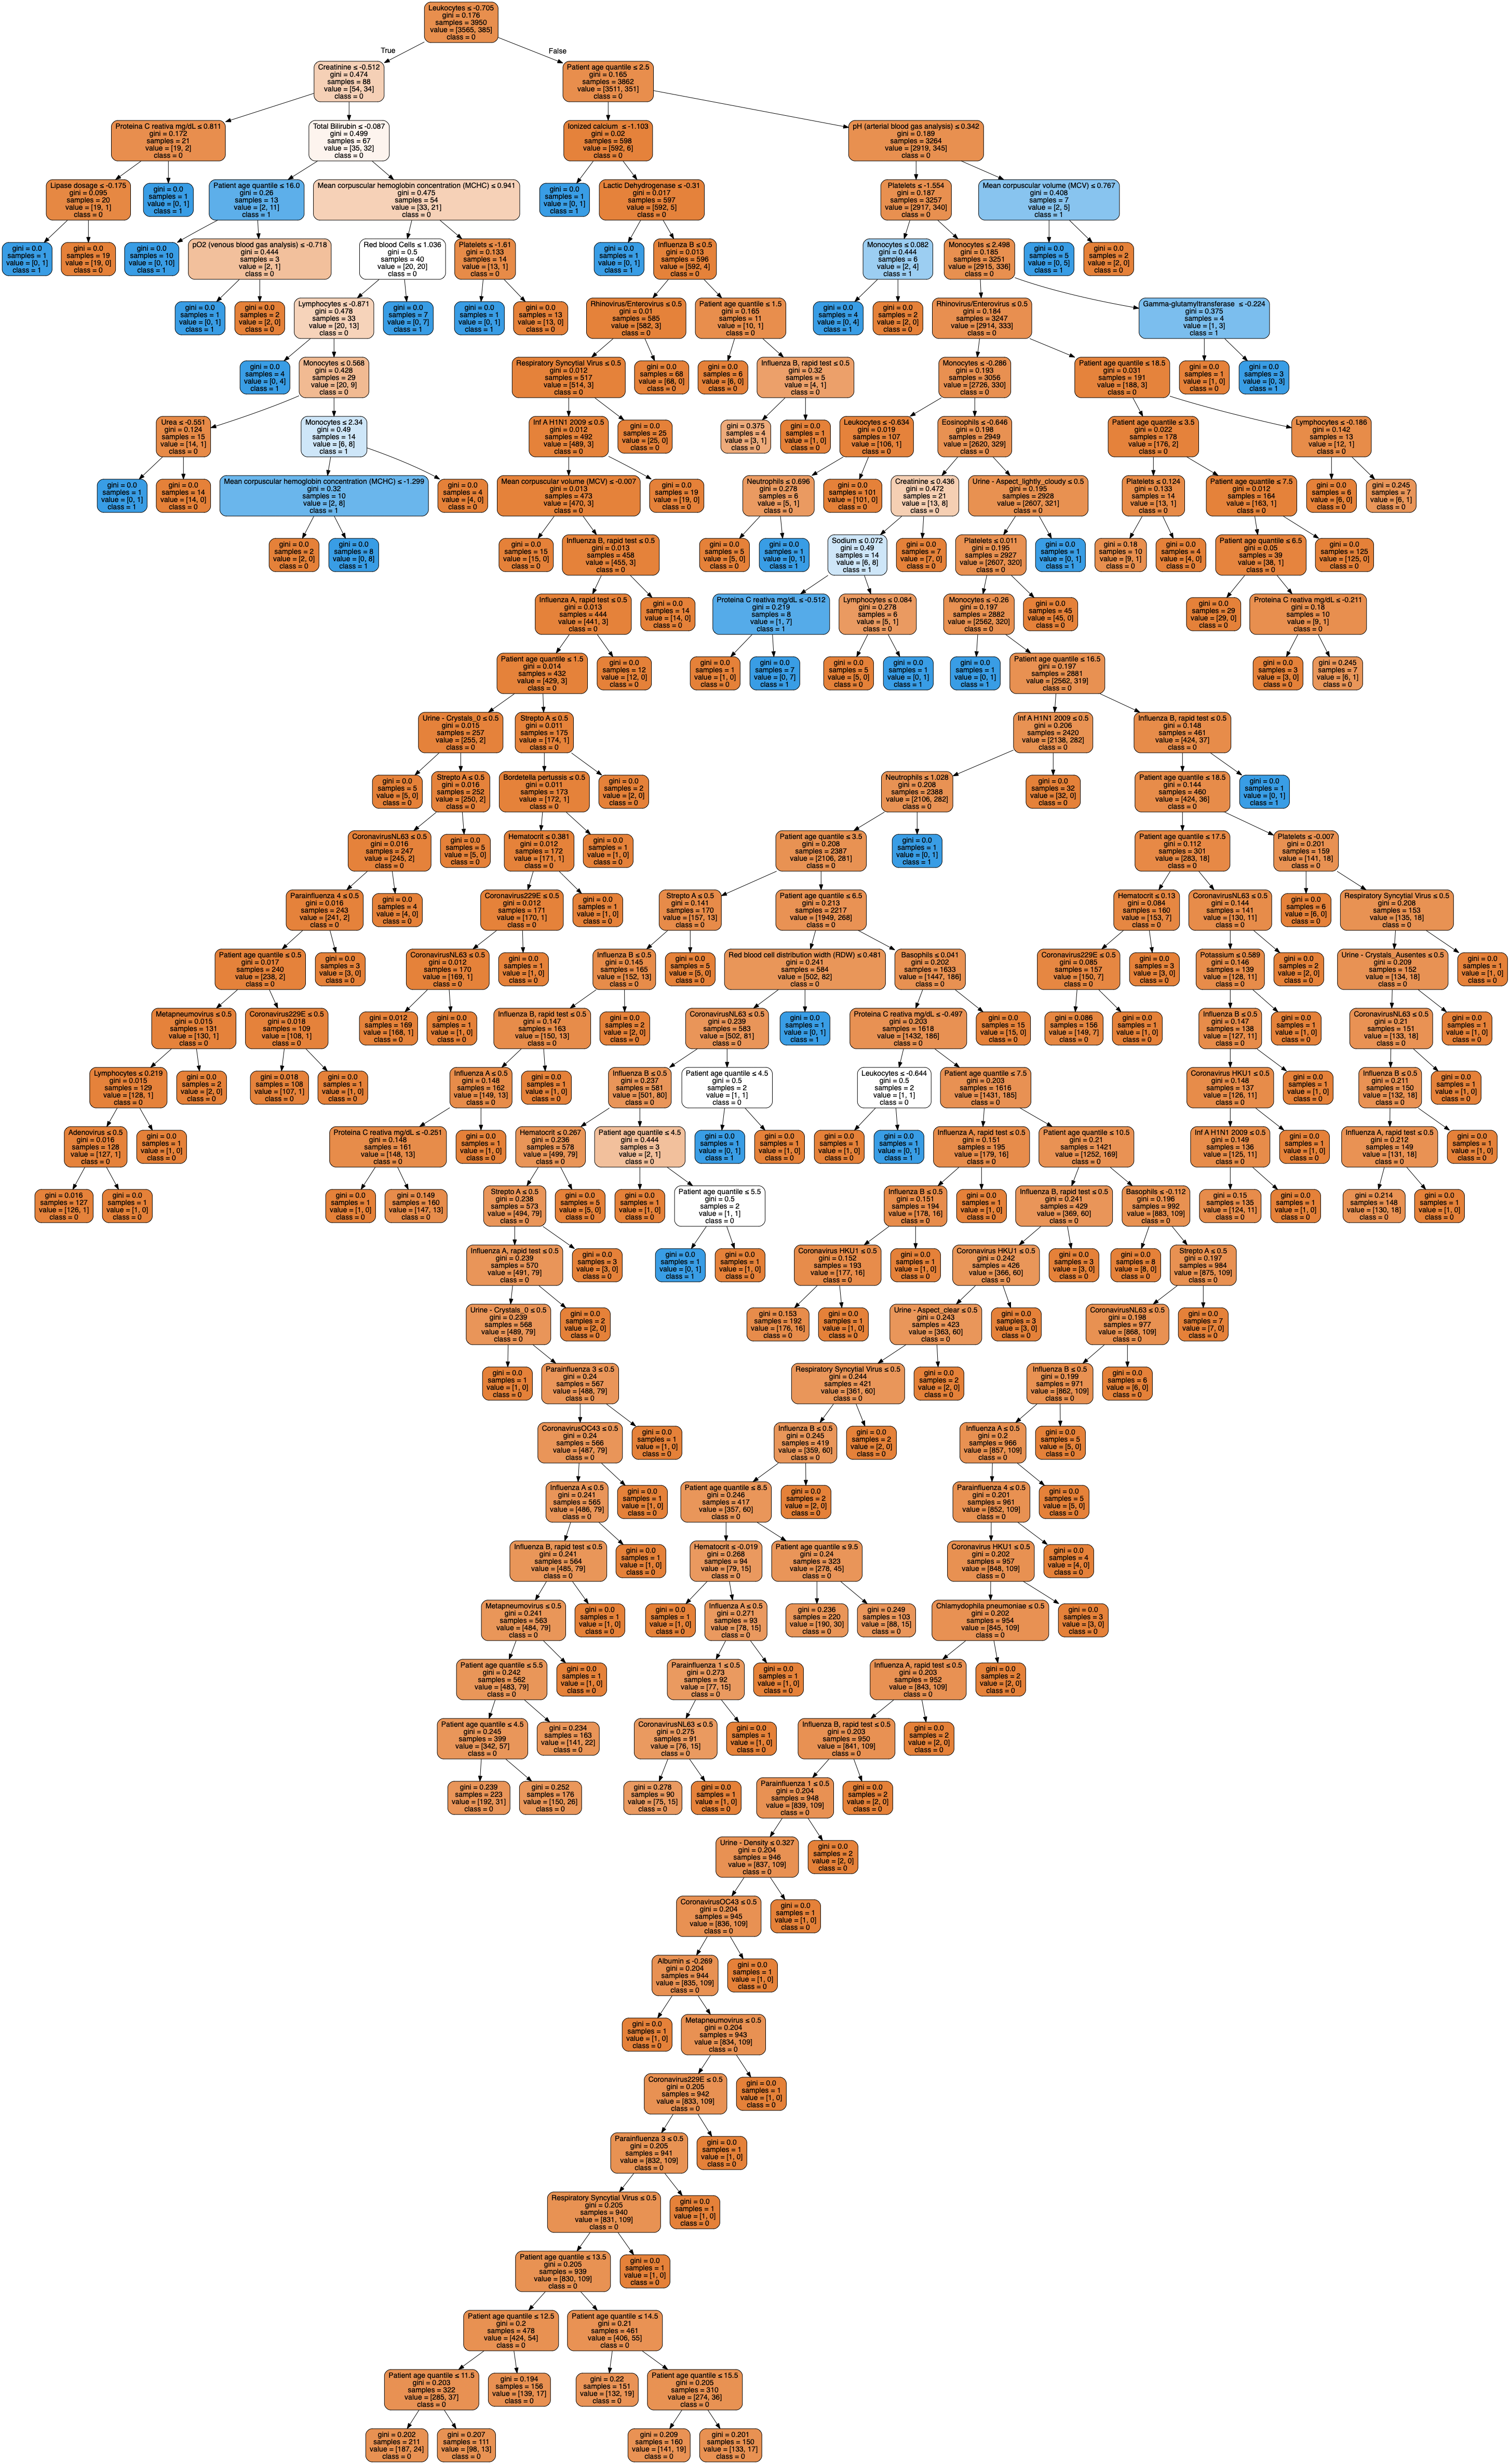

In [215]:
dot_data = StringIO()
export_graphviz(model_tree2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols2,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid2.png')
Image(graph.create_png())

### Although this tree is more extensive, it performs lightly poor than than the previous one. Let's check the ROC and AUC.

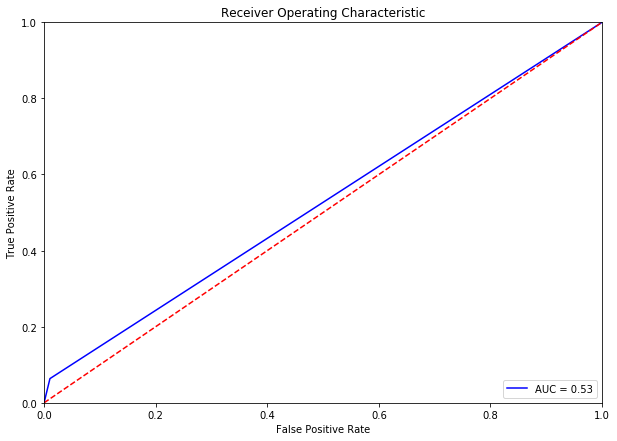

In [217]:
plot_roc_curve(Y_test, Y_pred_tree)

## Feature importance

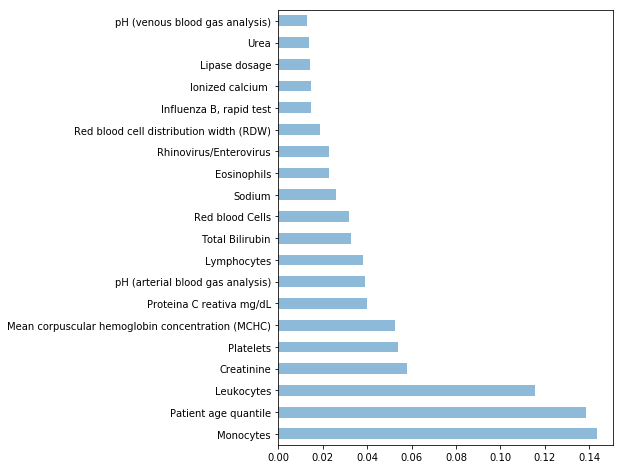

In [134]:
model_tree2.fit(X_train.values, Y_train.values)
feat_importances = pd.Series(model_tree2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(6, 8), alpha=0.5)

## Random Forest

In [219]:
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf2.fit(X_train, Y_train);

In [221]:
# Use the forest's predict method on the test data
predictions2 = rf2.predict(X_test)
# Calculate the absolute errors
errors2 = abs(predictions2 - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors2), 2), 'degrees.')

Mean Absolute Error: 0.17 degrees.


In [222]:
y_pred2 = rf2.predict(X_test)

In [224]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred2)))

Mean Absolute Error: 0.16843778279462324
Mean Squared Error: 0.08467292379673967
Root Mean Squared Error: 0.2909861230312189


In [239]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred2.round()))

Accuracy: 0.9020070838252656


In [247]:
#check confusion matrix

confusion_matrix(Y_test, y_pred2.round())

array([[1517,    4],
       [ 162,   11]])

In [242]:
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred2.round(),digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9035    0.9974    0.9481      1521
           1     0.7333    0.0636    0.1170       173

    accuracy                         0.9020      1694
   macro avg     0.8184    0.5305    0.5326      1694
weighted avg     0.8861    0.9020    0.8632      1694



### Logistic regression performs the best in this scenario followed by Random Forest and Decision trees.